In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [2]:
bro_inidata = pd.read_csv('final bro_plotting.csv')

In [3]:
print(bro_inidata)

          MMSI   Longitude    Latitude          Ship_Type
0    200000000   13.951118  108.567617          Passenger
1    210718000  112.721900   -7.201667  Unknown ship type
2    215390000  112.653733   -7.087883            Fishing
3    312256000   52.178768   -6.947093  Unknown ship type
4    352401408   51.920315   -4.873445   High-speed craft
..         ...         ...         ...                ...
506  525000265   14.004558  108.494688          Passenger
507  525000360  112.740843   -7.202142          Passenger
508  525000369   13.919998  108.780310          Passenger
509  525000653   57.238288  -13.532493          Passenger
510  525001047  112.729698   -7.207488          Passenger

[511 rows x 4 columns]


In [4]:
bro_inidata['Ship_Type'] = bro_inidata['Ship_Type'].str.lower()

In [5]:
print(bro_inidata['Ship_Type'].unique())

['passenger' 'unknown ship type' 'fishing' 'high-speed craft' 'tankers'
 'other types of vessels' 'tugs' 'cargo ' 'pilot'
 'search and rescue vessels' 'sailing']


In [6]:
minlon = 112
minlat = -8
maxlon = 114
maxlat = -6
lat0 = (maxlat+minlat)/2
lon0 = (maxlon+minlon)/2
lat1 = (maxlat+minlat)/2-20


Found 22 tankers ships.
Plotting tankers ships at coordinates: [(65594.91014883615, 93279.23028308002), (71387.59096685109, 80168.86429055466), (-5384295.0833826875, -502139.8601731997), (73239.52179352421, 79916.92723324732), (73758.4594445569, 80526.4766401276), (-5476795.347472896, -507847.98431246297), (65229.486728013784, 87551.43026005151), (71916.78495653644, 80574.01451763487), (-5432710.295433107, -479377.0712033954), (-5947448.802907276, 84405.69905712316), (-9788170.708431993, inf), (65883.5764545604, 84972.95392549504), (-5525623.459866627, -537188.3523513222), (65455.45702808037, 87153.96138033143), (-9728358.38818733, inf), (-5880019.000687918, -220418.73446127633), (71425.14240031566, 80067.6589773295), (65540.6508088512, 91114.41654812277), (66034.4438876922, 86175.67612927454), (72440.02365280816, 78778.14068495331), (-9705998.246518733, inf), (-5926253.251950586, -22070.34925955208)]

Found 100 passenger ships.
Plotting passenger ships at coordinates: [(-9731830.9859

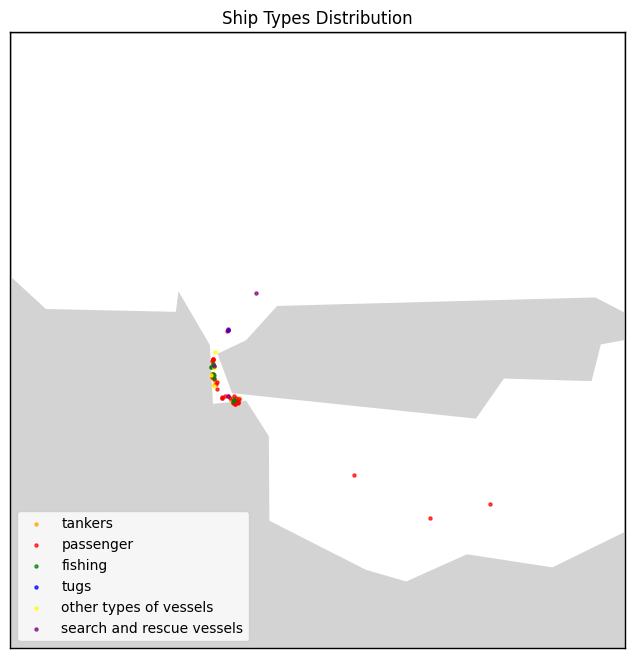

In [15]:
fig,ax=plt.subplots(figsize=(8,8))
m = Basemap(llcrnrlon=minlon,llcrnrlat=minlat,urcrnrlon=maxlon,
            urcrnrlat=maxlat,rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',lat_0=lat0,lon_0=lon0,
            lat_ts = lat1)
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='lightgrey',lake_color='white')
colors = {
  'tankers': 'orange',
    'passenger': 'red',      
    'fishing': 'green',
    'tugs': 'blue',
    'other types of vessels': 'yellow',
    'search and rescue vessels': 'purple',
}
for shiptype, color in colors.items():
    subset = bro_inidata[bro_inidata['Ship_Type'] == shiptype]
    print(f"\nFound {len(subset)} {shiptype} ships.")
    if not subset.empty:
        x, y = m(subset['Longitude'].values, subset['Latitude'].values)
        print(f"Plotting {shiptype} ships at coordinates: {list(zip(x, y))}")
        m.scatter(x, y, s=5, c=color, marker='o', alpha=0.7, label=shiptype)
    else:
        print(f"No {shiptype} ships found in the data.")    
plt.legend(loc='lower left')
plt.title('Ship Types Distribution')
plt.show()

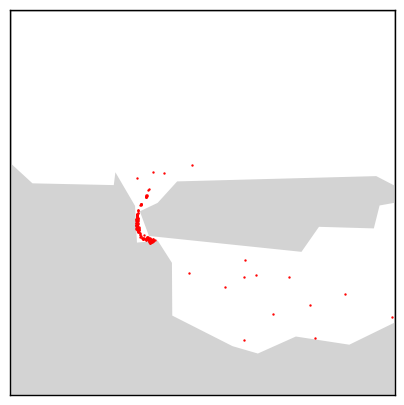

In [30]:
fig,ax=plt.subplots(figsize=(5,5))
m = Basemap(llcrnrlon=minlon,llcrnrlat=minlat,urcrnrlon=maxlon,
            urcrnrlat=maxlat,rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='cyl',lat_0=lat0,lon_0=lon0,
        lat_ts = lat1)
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='lightgrey',lake_color='white')
ship_types = ['Ferry', 'Cargo', 'Tanker', 'Passenger', 'Fishing']
colors = ['red', 'blue', 'green', 'yellow', 'purple']
for i, ship_type in enumerate(ship_types):
    mask = bro_inidata['Ship_Type'] == ship_type
x, y = m(bro_inidata['Longitude'],bro_inidata['Latitude'])
m.scatter(x,y,0.5,marker='o',c='red')